In [3]:
#Importing Key libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#load Data
df_train=pd.read_csv("C:/Users/giche/Downloads/Employee review/train.csv")
df_test=pd.read_csv("C:/Users/giche/Downloads/Employee review/test.csv")

In [67]:
df_test.head(5)

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,49
1,6,startup_1,"Mountain View, CA","Dec 9, 2018",Former Employee,SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,4,4,4,5,4,1
2,7,startup_1,"New York, NY","Dec 11, 2018",Current Employee,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,4,4,5,4,0
3,8,startup_1,NaN,"Dec 11, 2018",Former Employee,Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,0
4,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,0


In [66]:
df_train.head(5)

,review,negatives,review_clean,neg,neu,pos,compound,neg,neu,pos,...,word_your,word_youre,word_yourself,word_yr,word_zero,word_zone,word_zu,word_équipe,word_évolution,word_être
0,Bureaucracy is slowing things downPeople are s...,1,bureaucracy slow thing downpeople smart friendly,0.000,0.543,0.457,0.7096,0.000,0.543,0.457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1) Work/life balance. What balance? All those ...,1,work/life balance balance perk benefit illusio...,0.096,0.741,0.164,0.9926,0.096,0.741,0.164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"* It *is* becoming larger, and with it comes g...",0,become large come grow pain bureaucracy slow r...,0.060,0.751,0.189,0.9988,0.060,0.751,0.189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,I live in SF so the commute can take between 1...,1,live sf commute take hour hour way shuttle som...,0.056,0.735,0.209,0.9993,0.056,0.735,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Size matters. Engineers are a bit disconnected...,0,size matter engineer bit disconnected customer...,0.000,0.694,0.306,0.6486,0.000,0.694,0.306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Clean Data(Remove 'No Negative' and 'No Positive' from text)
df_train["review"] = df_train["review"].apply(lambda x: x.replace("No negatives", "").replace("No positives", ""))

In [11]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_train["review_clean"] = df_train["review"].apply(lambda x: clean_text(x))

In [13]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_train["sentiments"] = df_train["review"].apply(lambda x: sid.polarity_scores(x))
df_train = pd.concat([df_train.drop(['sentiments'], axis=1), df_train['sentiments'].apply(pd.Series)], axis=1)

In [15]:
# add number of characters column
df_train["nb_chars"] = df_train["review"].apply(lambda x: len(x))

# add number of words column
df_train["nb_words"] = df_train["review"].apply(lambda x: len(x.split(" ")))

In [18]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_train["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df_train["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df_train = pd.concat([df_train, doc2vec_df], axis=1)

In [20]:

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_train["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_train.index
df_train = pd.concat([df_train, tfidf_df], axis=1)

In [24]:
#Exploratory Data Analysis
# show is_bad_review distribution
df_train["negatives"].value_counts(normalize = True)

1    0.685258
0    0.314742
Name: negatives, dtype: float64

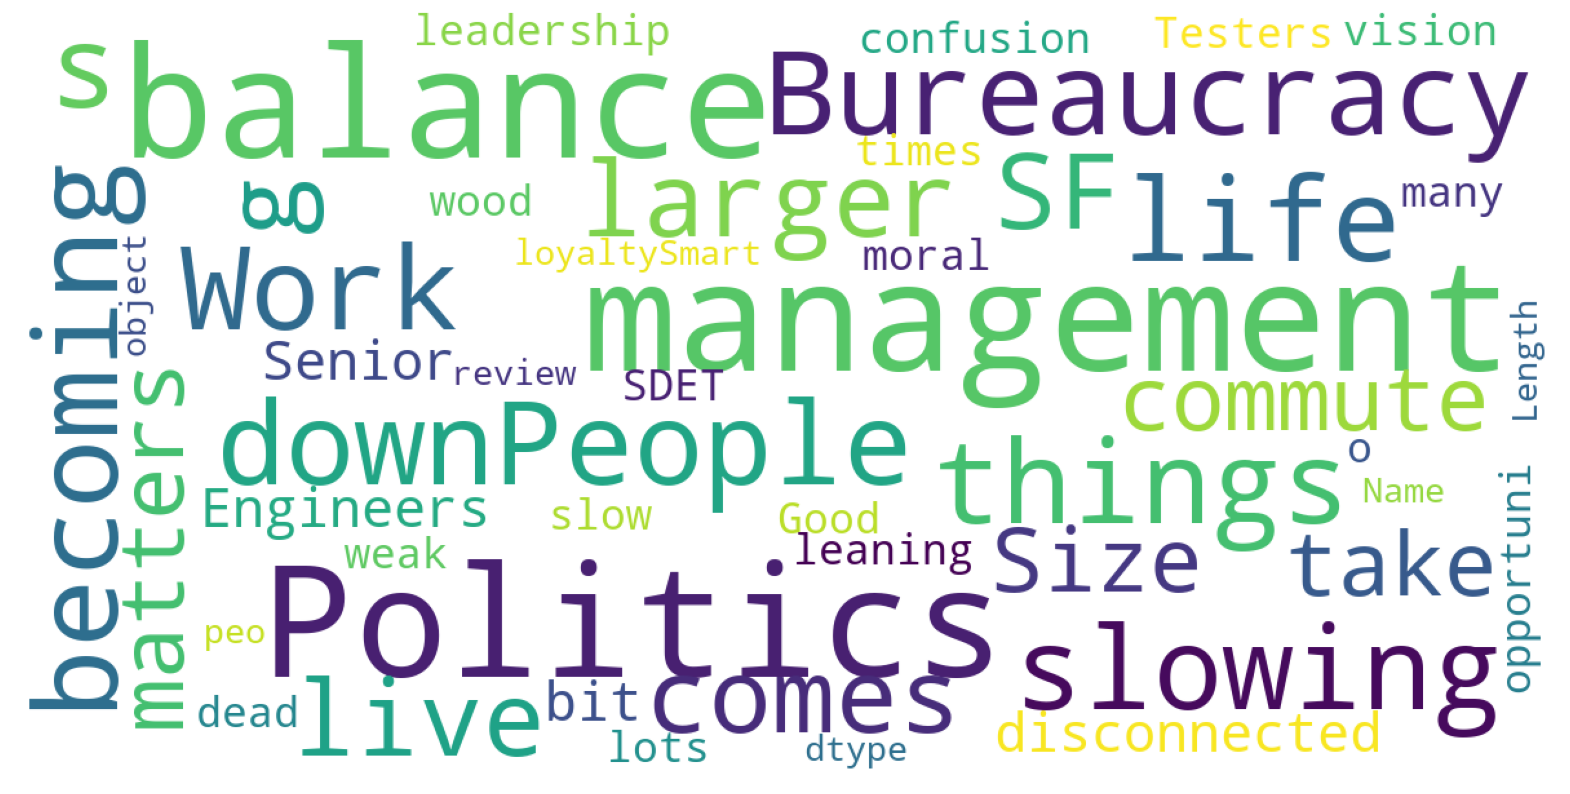

In [25]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_train["review"])

In [33]:
# highest negative sentiment reviews (with more than 5 words)
df_train[df_train["nb_words"] >= 5].sort_values("negatives", ascending = False)[["review", "neg"]].head(10)

,review,neg,neg
0,Bureaucracy is slowing things downPeople are s...,0.000,0.000
18379,Little crunch on timelines to deliver. Sometim...,0.047,0.047
18340,It's retail Local management has no power to m...,0.077,0.077
18339,Excessive and stressful workload for what you ...,0.077,0.077
18338,Pay an hours are horrible. Overtime was an exp...,0.133,0.133
18336,Hard to move up quickly. They mainly hire from...,0.071,0.071
18335,"Almost constantly on call, not much of a work ...",0.000,0.000
18334,You lose the social interaction that you find ...,0.184,0.184
18333,Working for managers that kissed butt to get w...,0.034,0.034
18332,"Not a lot of perks, store management plays fav...",0.000,0.000


C:\Users\giche\AppData\Local\Temp\ipykernel_3192\795989089.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
C:\Users\giche\AppData\Local\Temp\ipykernel_3192\795989089.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subse

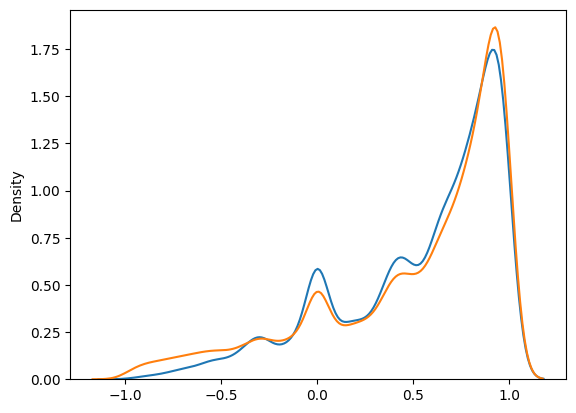

In [48]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df_train[df_train['negatives'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

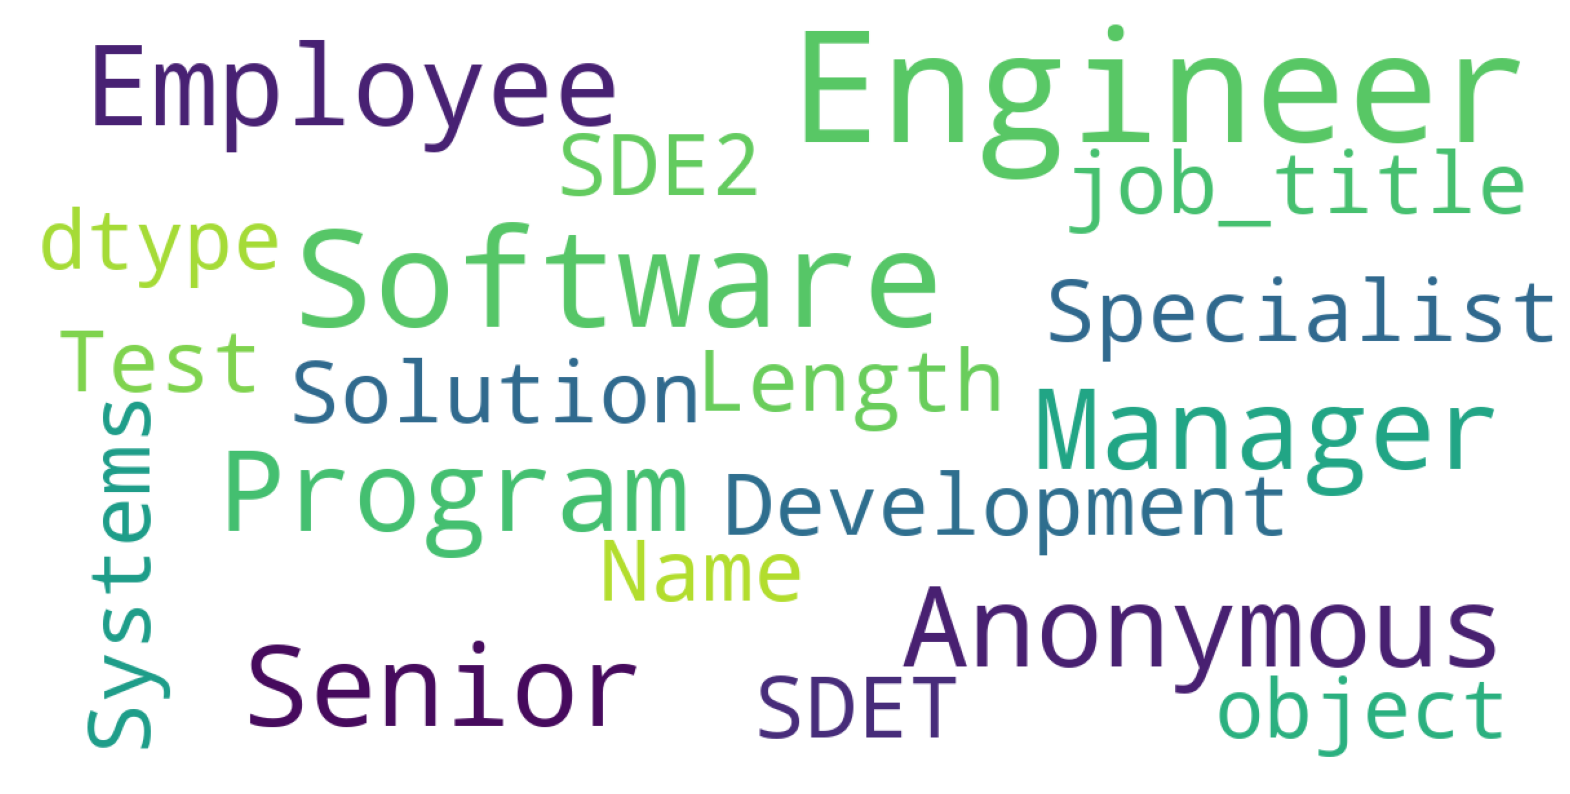

In [74]:
# Roles which the sample data was got from 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_test["job_title"])